# Data Cleaning

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [2]:
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [3]:
# reading in the train data
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
#inspiration for this function was used from https://saturncloud.io/blog/how-to-pandas-fillna-with-mode-of-column/ and help from chatGPT
#this function goes through the dataframe columns and checks whether the column has a datatype of an object or something else
#if it is an object, it will find the mode of the column and replace the NaN values with it
#if it is not an object, it will find the mean of the column and replace the NaN values with it

def apply_mean_and_mode(dataframe):
    mode = dataframe.mode().iloc[0]
    mean = dataframe.mean()
    
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col].fillna(mode[col], inplace=True)
        else:
            dataframe[col].fillna(mean[col], inplace=True)
            
    return dataframe

In [6]:
apply_mean_and_mode(train_df)

C:\Users\sophi\AppData\Local\Temp\ipykernel_12812\2763559512.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = dataframe.mean()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,69.0552,13517,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0000,11449,Pave,Grvl,IR1,HLS,...,0,0,Gd,MnPrv,Shed,0,1,2008,WD,298751
2047,785,905377130,30,RL,69.0552,12342,Pave,Grvl,IR1,Lvl,...,0,0,Gd,MnPrv,Shed,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0000,7558,Pave,Grvl,Reg,Bnk,...,0,0,Gd,MnPrv,Shed,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0000,10400,Pave,Grvl,Reg,Lvl,...,0,0,Gd,MnPrv,Shed,0,11,2009,WD,144000


In [7]:
train_df.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [8]:
train_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [9]:
#reading in the test data
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
apply_mean_and_mode(test_df)

C:\Users\sophi\AppData\Local\Temp\ipykernel_12812\2763559512.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = dataframe.mean()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,Grvl,IR1,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,Grvl,IR1,Lvl,...,0,185,0,Ex,MnPrv,Shed,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.000000,8000,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,11,2007,WD
874,1234,535126140,60,RL,90.000000,14670,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2008,WD
875,1373,904100040,20,RL,55.000000,8250,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,MnPrv,Shed,0,8,2008,WD
876,1672,527425140,20,RL,60.000000,9000,Pave,Grvl,Reg,Lvl,...,0,0,0,Ex,GdWo,Shed,0,5,2007,WD


In [11]:
test_df.isna().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 80, dtype: int64

# Linear Regression Model

In [12]:
X = train_df[['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']]
y = train_df['SalePrice']

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(X)

In [13]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.2, random_state=42)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [16]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [17]:
ols.score(Z_train, y_train)

0.911362662600972

In [18]:
ols.score(Z_test, y_test)

0.900866679617698

In [19]:
#ols.coef_

In [20]:
y_pred = lr.predict(X_test)

In [21]:
lr.score(X_train, y_train)

0.9113626626009766

In [22]:
lr.score(X_test, y_test)

0.900866679580069

In [23]:
lr.coef_

array([-5.16505461e+04,  3.90537984e+04,  9.25708173e+03, -3.94210947e+04,
        3.02594700e+02, -1.54151588e+03, -1.27810826e+03, -3.60780445e+05,
       -2.99322634e+05,  1.24378678e+05, -7.67560128e+05,  2.81147475e+05,
       -7.24451114e+04,  1.87780027e+05, -9.25174353e+02, -2.83491177e+02,
        1.24115826e+03,  3.53212088e+01, -1.45375702e+01,  6.95248575e+00,
        1.84320935e+01,  1.30126939e+01, -2.37508225e+03,  6.11278729e+02,
       -4.07232023e+03, -1.17213749e+04,  1.45227308e+03,  3.47358096e+02,
       -1.56220012e+03,  1.25473096e+01, -1.53632270e+03, -7.27779702e+00,
        7.60388170e-01, -3.58146533e+00, -2.44937724e+00,  1.17166035e+00,
       -2.52237095e+03, -3.34957398e+03, -2.54136336e+01,  3.71209600e+02,
       -2.99003734e+02,  1.82563275e+03,  6.21113709e+03, -1.73355138e+01,
       -8.78295831e-01, -2.76482194e+00, -1.84874041e-01,  4.89269055e-01,
        1.63067288e-01,  6.02649204e+01, -5.45097567e+01,  4.42331099e+01,
       -7.51103291e+01, -

In [24]:
set(zip(X.columns, lr.coef_))

{('1st Flr SF', -1541.515880800358),
 ('2nd Flr SF', -1278.1082602628892),
 ('Bedroom AbvGr', 124378.67759054665),
 ('Fireplaces', -72445.11141205851),
 ('Full Bath', -360780.44527197164),
 ('Garage Area', -925.1743530176406),
 ('Garage Cars', 187780.0269569845),
 ('Half Bath', -299322.63394601987),
 ('Kitchen AbvGr', -767560.1279819699),
 ('Overall Cond', 39053.79841249455),
 ('Overall Qual', -51650.546087563685),
 ('TotRms AbvGrd', 281147.4754081553),
 ('Total Bsmt SF', 302.5946995632849),
 ('Year Built', 9257.081732897717),
 ('Year Remod/Add', -39421.094736599225)}

In [25]:
#interpretation example:
#for a one unit increase in garage cars, we expect the saleprice to increase $187780.03

In [26]:
y_pred = lr.predict(X_overfit)
y_pred

array([174182.82719749, 230033.11782101, 134219.93692346, ...,
       180658.55312843, 135759.57669812, 217543.63821153])

In [27]:
metrics.r2_score(y, y_pred)

0.9093758670434448

In [28]:
#MSE
metrics.mean_squared_error(y, y_pred)

569017350.6865566

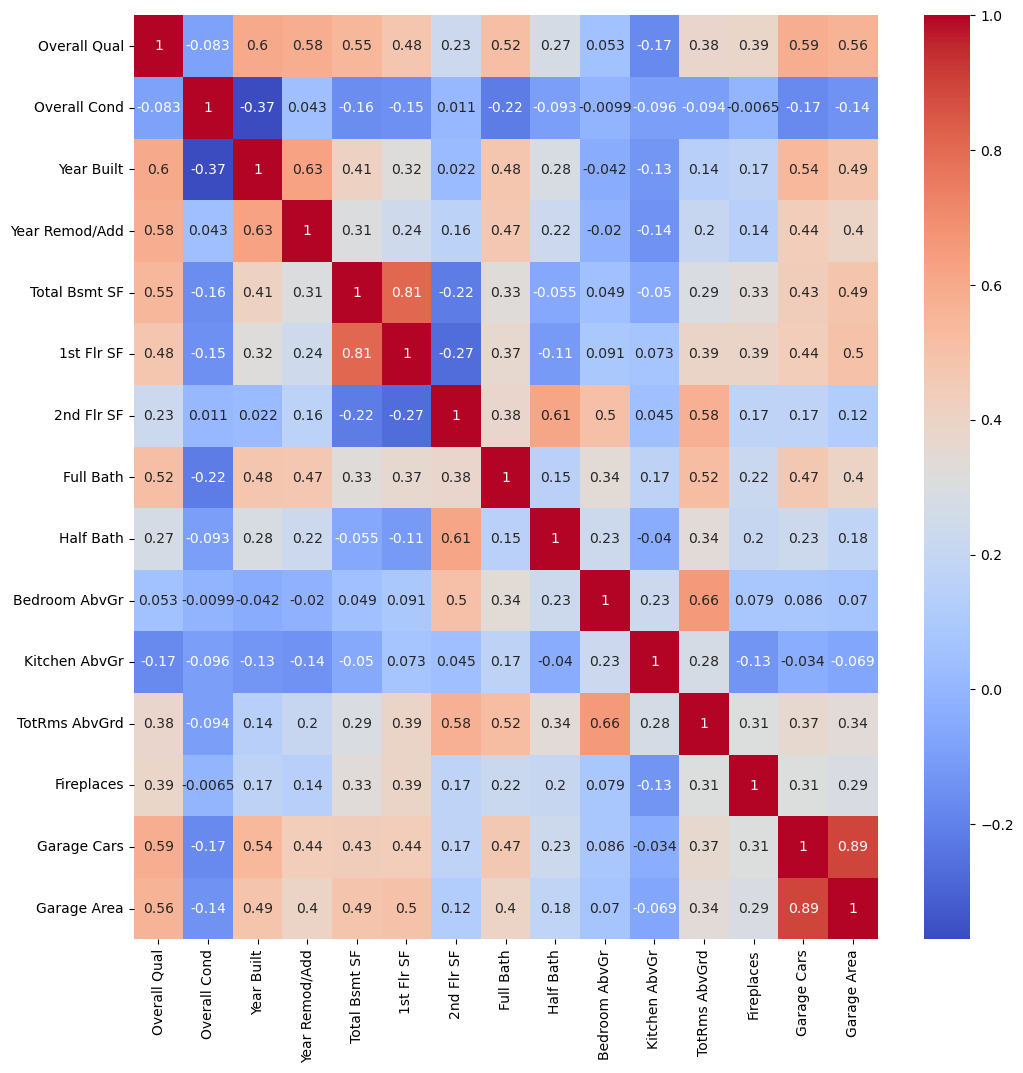

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True);

In [30]:
#submission to Kaggle

In [31]:
test = test_df[['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']]

In [32]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(test)

In [33]:
predictions = ols.predict(X_overfit)

In [34]:
test_df['SalePrice'] = predictions

In [35]:
submission = test_df[['Id', 'SalePrice']]

In [36]:
submission.to_csv('second_model.csv', index=False)